In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_excel("data_cln.xlsx")
data=df.copy(deep=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1430 non-null   int64  
 1   product_title                 1430 non-null   object 
 2   price                         1430 non-null   float64
 3   retail_price                  1430 non-null   int64  
 4   units_sold                    1430 non-null   int64  
 5   uses_ad_boosts                1430 non-null   int64  
 6   rating                        1430 non-null   float64
 7   rating_count                  1430 non-null   int64  
 8   rating_five_count             1430 non-null   int64  
 9   rating_four_count             1430 non-null   int64  
 10  rating_three_count            1430 non-null   int64  
 11  rating_two_count              1430 non-null   int64  
 12  rating_one_count              1430 non-null   int64  
 13  bad

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
#drop 不必要的欄位 
modelData=data.drop(['product_title','Unnamed: 0','urgency_text','merchant_title','merchant_info_subtitle','product_id','theme'],axis=1)

#為數值型資料做label
labelencoder = LabelEncoder()
modelData['product_variation_size_id'] = labelencoder.fit_transform(modelData['product_variation_size_id'].astype('str'))
modelData['origin_country'] = labelencoder.fit_transform(modelData['origin_country'].astype('str'))

modelData.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,product_variation_size_id,product_variation_inventory,shipping_price,shipping_is_express,countries_shipped_to,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,100,0,3.76,54,26,8,10,1,...,39,50,4,0,34,1,0,568,4.128521,0
1,8.00,22,20000,1,3.45,6135,2269,1027,1118,644,...,76,50,2,0,41,1,0,17752,3.899673,0
2,8.00,43,100,0,3.57,14,5,4,2,0,...,76,1,3,0,36,1,0,295,3.989831,0
3,8.00,8,5000,1,4.03,579,295,119,87,42,...,39,50,2,0,41,0,0,23832,4.020435,0
4,2.72,3,100,1,3.10,20,6,4,2,2,...,43,1,1,0,35,1,0,14482,4.001588,0


In [39]:
modelData

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,product_variation_size_id,product_variation_inventory,shipping_price,shipping_is_express,countries_shipped_to,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,100,0,3.76,54,26,8,10,1,...,39,50,4,0,34,1,0,568,4.128521,0
1,8.00,22,20000,1,3.45,6135,2269,1027,1118,644,...,76,50,2,0,41,1,0,17752,3.899673,0
2,8.00,43,100,0,3.57,14,5,4,2,0,...,76,1,3,0,36,1,0,295,3.989831,0
3,8.00,8,5000,1,4.03,579,295,119,87,42,...,39,50,2,0,41,0,0,23832,4.020435,0
4,2.72,3,100,1,3.10,20,6,4,2,2,...,43,1,1,0,35,1,0,14482,4.001588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,6.00,9,10000,1,4.08,1367,722,293,185,77,...,43,50,2,0,41,0,0,5316,4.224605,0
1426,2.00,56,100,1,3.07,28,11,3,1,3,...,43,2,1,0,26,1,0,4435,3.696054,0
1427,5.00,19,100,0,3.71,59,24,15,8,3,...,50,15,2,0,11,0,0,210,3.961905,0
1428,13.00,11,100,0,2.50,2,0,1,0,0,...,58,36,3,0,29,0,0,31,3.774194,0


In [40]:
modelData.set_option('display.max_columns',28)
modelData.head(0)

AttributeError: 'DataFrame' object has no attribute 'set_option'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



Text(0, 0.5, 'kmeans inertia')

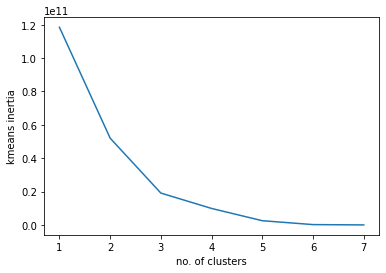

In [41]:
from sklearn.cluster import KMeans

#手肘圖
clusters = {}
for i in range(1,8):
    kmeans=KMeans(n_clusters=i)
    kmeans=kmeans.fit(modelData[['units_sold','rating']])
    clusters[i] = kmeans.inertia_
    
plt.plot(list(clusters.keys()), list(clusters.values()))
#Inertia實際上計算cluster內所有點到該cluster的質心的距離的總和 （所以數值越大代表差距越大）

plt.xlabel('no. of clusters')
plt.ylabel('kmeans inertia')

In [42]:
#order cluster method
#只是將資料依照target欄位，將cluster結果做排序（可不用理會）
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [43]:
#實際將資料分三群
modelData['units_sold_cluster']=KMeans(n_clusters=3).fit(modelData[['units_sold','rating']]).predict(modelData[['units_sold','rating']])
modelData = order_cluster('units_sold_cluster','units_sold', modelData, True)
modelData.groupby(['units_sold_cluster'])['units_sold'].describe()
display(modelData)
modelData.to_excel("Clustered.xlsx")

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,product_variation_inventory,shipping_price,shipping_is_express,countries_shipped_to,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,units_sold_cluster
0,16.00,14,100,0,3.76,54,26,8,10,1,...,50,4,0,34,1,0,568,4.128521,0,0
1,8.00,43,100,0,3.57,14,5,4,2,0,...,1,3,0,36,1,0,295,3.989831,0,0
2,8.00,8,5000,1,4.03,579,295,119,87,42,...,50,2,0,41,0,0,23832,4.020435,0,0
3,2.72,3,100,1,3.10,20,6,4,2,2,...,1,1,0,35,1,0,14482,4.001588,0,0
4,3.92,9,10,0,5.00,1,1,0,0,0,...,1,1,0,40,0,0,65,3.507692,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,9.00,8,50000,0,3.83,13198,6060,2562,2214,1033,...,50,3,0,53,0,0,37076,4.302082,1,2
1426,6.00,6,50000,0,4.20,12880,7337,2647,1643,623,...,18,2,0,53,0,0,38264,4.227943,0,2
1427,11.00,10,50000,0,3.91,13488,6325,3006,1998,916,...,50,3,0,31,0,0,17816,4.179445,1,2
1428,5.67,19,100000,0,3.53,18393,6769,3404,3658,2003,...,50,1,0,37,1,0,19248,3.889131,0,2


In [44]:
modelData.groupby('units_sold_cluster')[['rating','units_sold']].describe().T

units_sold_cluster            0             1              2
rating     count    1146.000000    265.000000      19.000000
           mean        3.755410      3.890264       3.926316
           std         0.508838      0.286522       0.236953
           min         1.000000      2.970000       3.450000
           25%         3.470000      3.700000       3.820000
           50%         3.800000      3.930000       3.930000
           75%         4.080000      4.110000       4.055000
           max         5.000000      4.480000       4.410000
units_sold count    1146.000000    265.000000      19.000000
           mean     1294.589005  13660.377358   63157.894737
           std      1802.019488   4826.314377   22620.696418
           min         0.000000  10000.000000   50000.000000
           25%       100.000000  10000.000000   50000.000000
           50%      1000.000000  10000.000000   50000.000000
           75%      1000.000000  20000.000000   75000.000000
           max      5000.000000  20000.000000  100000.000000

In [45]:
us_mean=[1294.589005,13660.377358,63157.894737]
r_mean=[3.755410,3.890264,3.926316]
cluster=['第0分群','第1分群','第2分群']

In [46]:
re=pd.DataFrame(us_mean,cluster)

In [47]:
re.columns=['銷量']
re=re.reset_index()

In [48]:
re.columns=['分群','銷量']
re

,分群,銷量
0,第0分群,1294.589005
1,第1分群,13660.377358
2,第2分群,63157.894737


In [49]:
px.bar(re,'分群','銷量',color_discrete_sequence =['#435268']*10,text_auto=True)

In [175]:
rr=pd.DataFrame(r_mean,cluster)
rr.columns=['評分平均']


In [190]:
rr.columns=['分群','評分']

In [192]:
px.bar(rr,'分群','評分',color_discrete_sequence =['#FCA311']*10,text_auto=True,title='各分群 平均評分')

In [8]:
#tag

In [50]:
!pip install wordcloud
from wordcloud import WordCloud

['fashion', 'dress', 'women', 'summer', "women's", 'casual', 'tops', 'sleeveless']


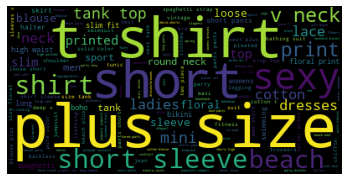

In [51]:
# 全部
stat= " ".join(data['tags'].str.lower().str.split(',').sum())
total=[]
common=[]

for i in list(stat.split(" ")):
    if total.count(i)<len(data['tags'].tolist())*0.5:
        total.append(i)
    elif i in common:
        continue
    else:
        common.append(i)
print(common)

clean=filter(lambda x:x not in common,stat.split(" "))
result=" ".join(list(clean))

cloud = WordCloud().generate(result)
cloud.to_file('Tag.png')
plt.imshow(cloud)
plt.axis('off')
plt.show() 

In [52]:
b=pd.DataFrame(result.split(" "))
c1=pd.DataFrame(b[0].value_counts())
c1=c1.sort_values(0,ascending=False)
c1=c1.reset_index()
c1.columns=['Tag','count']
c1['count']=c1['count']/c1['count'].sum()*100
c1.columns=['Tag','percentage（%）']
display(c1.head(10))

,Tag,percentage（%）
0,shorts,3.118708
1,size,3.002371
2,plus,2.988948
3,top,2.469909
4,shirt,2.443062
5,tank,2.429639
6,beach,2.429639
7,short,2.170119
8,sexy,2.107477
9,pants,2.076156


In [53]:
import plotly.express as px
px.bar(c1.head(10),'Tag','percentage（%）',color_discrete_sequence =['#435268']*10)

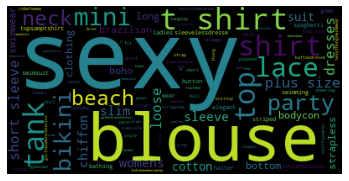

In [54]:
# 第三分群

stat3=" ".join(modelData[modelData['units_sold_cluster']==2]['tags'].str.lower().str.split(',').sum())
clean3=filter(lambda x:x not in common,stat3.split(" "))
resultQ3=" ".join(clean3)

cloud = WordCloud().generate(resultQ3)
cloud.to_file('Tag_Q3.png')
plt.imshow(cloud)
plt.axis('off')
plt.show() 

In [55]:
a=pd.DataFrame(resultQ3.split(" "))
c3=pd.DataFrame(a[0].value_counts())
c3=c3.sort_values(0,ascending=False)
c3=c3.reset_index()
c3.columns=['Tag','count']
c3['count']=c3['count']/c3['count'].sum()*100
c3.columns=['Tag','percentage（%）']
display(c3.head(10))

,Tag,percentage（%）
0,sexy,5.0000
1,tank,4.0625
2,top,4.0625
3,shirt,3.7500
4,lace,3.4375
5,blouse,3.4375
6,mini,2.8125
7,party,2.5000
8,sleeve,2.5000
9,plus,2.1875


In [56]:
import plotly.express as px
px.bar(c3.head(10),'Tag','percentage（%）',color_discrete_sequence =['#435268']*10)

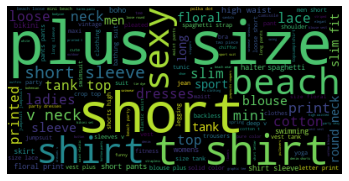

In [57]:
#第一分群

stat1=" ".join(modelData[modelData['units_sold_cluster']==0]['tags'].str.lower().str.split(',').sum())
clean1=filter(lambda y:y not in common,stat1.split(" "))
resultQ1=" ".join(clean1)

cloud = WordCloud().generate(resultQ1)
cloud.to_file('Tag_Q1.png')
plt.imshow(cloud)
plt.axis('off')
plt.show() 

In [144]:
clean1

In [58]:
b=pd.DataFrame(resultQ1.split(" "))
c1=pd.DataFrame(b[0].value_counts())
c1=c1.sort_values(0,ascending=False)
c1=c1.reset_index()
c1.columns=['Tag','count']
c1['count']=c1['count']/c1['count'].sum()*100
c1.columns=['Tag','percentage（%）']
display(c1.head(10))

,Tag,percentage（%）
0,shorts,3.400709
1,size,3.062891
2,plus,3.051630
3,beach,2.505490
4,shirt,2.499859
5,top,2.308429
6,short,2.263386
7,tank,2.229604
8,print,2.173301
9,pants,2.122628


In [27]:
px.bar(c1.head(10),'Tag','percentage（%）',color_discrete_sequence =['#465268']*10)

In [18]:
## 顏色

In [39]:
modelData

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,product_variation_inventory,shipping_price,shipping_is_express,countries_shipped_to,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,units_sold_cluster
0,16.00,14,100,0,3.76,54,26,8,10,1,...,50,4,0,34,1,0,568,4.128521,0,0
1,8.00,43,100,0,3.57,14,5,4,2,0,...,1,3,0,36,1,0,295,3.989831,0,0
2,8.00,8,5000,1,4.03,579,295,119,87,42,...,50,2,0,41,0,0,23832,4.020435,0,0
3,2.72,3,100,1,3.10,20,6,4,2,2,...,1,1,0,35,1,0,14482,4.001588,0,0
4,3.92,9,10,0,5.00,1,1,0,0,0,...,1,1,0,40,0,0,65,3.507692,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,9.00,8,50000,0,3.83,13198,6060,2562,2214,1033,...,50,3,0,53,0,0,37076,4.302082,1,2
1426,6.00,6,50000,0,4.20,12880,7337,2647,1643,623,...,18,2,0,53,0,0,38264,4.227943,0,2
1427,11.00,10,50000,0,3.91,13488,6325,3006,1998,916,...,50,3,0,31,0,0,17816,4.179445,1,2
1428,5.67,19,100000,0,3.53,18393,6769,3404,3658,2003,...,50,1,0,37,1,0,19248,3.889131,0,2


In [40]:
modelData[data['units_sold_cluster']==0]

KeyError: 'units_sold_cluster'

In [82]:
aa=modelData[modelData['units_sold_cluster']==0]
aa=pd.DataFrame(aa)
aa.reset_index()
aa=aa['product_color'].value_counts()
aa=pd.DataFrame(aa)

In [103]:
aa=aa.head(10)
aa

,product_color
Black,214
White,180
Yellow,88
Pink,87
Blue,77
Red,75
Green,72
Grey,52
Purple,33
Armygreen,27


In [141]:
aa=aa.reset_index()
aa

,index,product_color
0,Black,214
1,White,180
2,Yellow,88
3,Pink,87
4,Blue,77
5,Red,75
6,Green,72
7,Grey,52
8,Purple,33
9,Armygreen,27


In [142]:
aa.columns=['color','count']

In [145]:
aa=aa.head(7)
px.bar(aa,'color','count',color_discrete_sequence =['#FCA311']*10,title="第0分群 顏色統計長條圖")

In [78]:
aa2=modelData[modelData['units_sold_cluster']!=0]
aa2=pd.DataFrame(aa2)
aa2.reset_index()
aa2=aa2['product_color'].value_counts()
aa2=pd.DataFrame(aa2)

In [139]:
px.bar(aa2,'color','count',color_discrete_sequence =['#FCA311']*10,title="第1、2分群 顏色統計長條圖")

In [138]:
aa2=aa2.head(10)
aa2=aa2.head(7)
aa2
aa2.columns=["0","color","count"]

In [99]:
black=aa2.iloc[0,0]-aa.iloc[0,0]
black

-143

In [100]:
white=aa2.iloc[1,0]-aa.iloc[1,0]
white

-131

In [104]:
blue=aa2.iloc[2,0]-aa.iloc[4,0]
blue

-60

In [106]:
purple=aa2.iloc[3,0]-aa.iloc[8,0]
purple

-16

In [108]:
red=aa2.iloc[4,0]-aa.iloc[5,0]
red

-59

In [110]:
grey=aa2.iloc[5,0]-aa.iloc[7,0]
grey

-36

In [117]:
pink=aa2.iloc[6,0]-aa.iloc[3,0]
pink

-75

In [125]:
r=pd.DataFrame([black,white,blue,purple,red,grey,pink],["black","white","blue","purple","red","grey","pink"],columns=["count"])

In [127]:
r=r.reset_index()


,level_0,index,count
0,0,black,-143
1,1,white,-131
2,2,blue,-60
3,3,purple,-16
4,4,red,-59
5,5,grey,-36
6,6,pink,-75


In [131]:
r.columns=['00','color','count']

In [129]:
r=r.sort_values('count',ascending=False)
r

,level_0,index,count
3,3,purple,-16
5,5,grey,-36
4,4,red,-59
2,2,blue,-60
6,6,pink,-75
1,1,white,-131
0,0,black,-143


In [132]:
import plotly.express as px
px.bar(r,'color','count',color_discrete_sequence =['#FCA311']*10)

In [90]:
df=pd.merge(aa,aa2,how="left")
df

,product_color
0,214
1,180
2,88
3,87
4,77
5,75
6,72
7,52
8,33
9,27


In [44]:
aa['product_color'].tolist()

['Black',
 'White',
 'Grey',
 'Purple',
 'Blue',
 'Red',
 'Green',
 'Pink',
 'Yellow',
 'Orange']

In [17]:
counting=pd.DataFrame(data1)

NameError: name 'data1' is not defined

In [169]:
counting

,Unnamed: 0,product_title,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_id,theme
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26,8,...,1,Limited quantity !,CN,zgrdejia,(568 notes),568,4.128521,0,5e9ae51d43d6a96e303acdb0,summer
1,1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269,1027,...,1,Limited quantity !,CN,SaraHouse,"83 % avis positifs (17,752 notes)",17752,3.899673,0,58940d436a0d3d5da4e95a38,summer
2,2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5,4,...,1,Limited quantity !,CN,hxt520,86 % avis positifs (295 notes),295,3.989831,0,5ea10e2c617580260d55310a,summer
3,3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295,119,...,0,NaN,CN,allenfan,"(23,832 notes)",23832,4.020435,0,5cedf17ad1d44c52c59e4aca,summer
4,4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6,4,...,1,Limited quantity !,CN,youngpeopleshop,"85 % avis positifs (14,482 notes)",14482,4.001588,0,5ebf5819ebac372b070b0e70,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722,293,...,0,NaN,CN,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,0,5d5fadc99febd9356cbc52ee,summer
1426,1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11,3,...,1,Limited quantity !,CN,sell best quality goods,"(4,435 notes)",4435,3.696054,0,5eccd22b4497b86fd48f16b4,summer
1427,1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24,15,...,0,NaN,CN,shixueying,86 % avis positifs (210 notes),210,3.961905,0,5e74be96034d613d42b52dfe,summer
1428,1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0,1,...,0,NaN,CN,modai,77 % avis positifs (31 notes),31,3.774194,0,5eda07ab0e295c2097c36590,summer


In [45]:
data1=data.copy(deep=False)

In [47]:
aaa=[]
for j in range(len(data1)):
    if data1.iloc[j,18] not in aa['product_color'].tolist():
        aaa.append(j)
data1=data1.drop(aaa)

In [51]:
!pip install chart-studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=075828baf4c72263be0b1415254eaa823c926f37699d2071dc24db8d7c749a6f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [52]:
from chart_studio import plotly

In [60]:

px.box(data1,x='product_color',y='units_sold',title='銷量前十 顏色盒狀圖（刪除離群值）',points=False)

In [22]:
abc=pd.DataFrame(data)

In [24]:
abc.groupby("product_color")['units_sold'].mean()

product_color
Applegreen            100.000000
Apricot               550.000000
Army                 1000.000000
Army green           4000.000000
Armygreen            2456.666667
                        ...     
Wine                  550.000000
Wine red            50000.000000
Winered              2714.814815
Winered & yellow     1000.000000
Yellow               2307.312500
Name: units_sold, Length: 93, dtype: float64

In [11]:
stat= " ".join(data['product_color'].str.lower().str.split(',').sum())

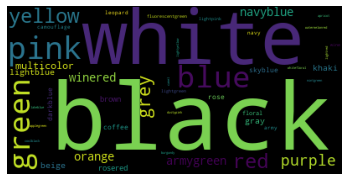

In [12]:
cloud = WordCloud().generate(stat)
cloud.to_file('color.png')
plt.imshow(cloud)
plt.axis('off')
plt.show() 

In [13]:
c=pd.DataFrame(stat.split(" "))
c1=pd.DataFrame(c[0].value_counts())
c1=c1.sort_values(0,ascending=False)
c1=c1.reset_index()
c1.columns=['color','count']
display(c1.head(10))

,color,count
0,black,301
1,white,249
2,pink,108
3,blue,102
4,yellow,100
5,green,100
6,red,95
7,grey,70
8,purple,50
9,&,40


In [15]:
import plotly.express as px

In [17]:
px.bar(c1.head(5),'color','count',color_discrete_sequence =['']*10)

In [18]:
# 第二、三分群
stat3c=" ".join(modelData[modelData['units_sold_cluster']!=0]['product_color'].astype('str').str.lower().str.split(',').sum())
stat3c

'green yellow red blue black white yellow white yellow black & green orange purple whitefloral grey pink pink floral grey black red blue camouflage green green black black pink purple black multicolor black white white black red leopard white pink grey grey red white dustypink white black black white black black red white purple white blue purple white & black white purple white pink yellow burgundy black black white blue pink grey blue blue red black black beige white red white black white black armygreen white rosered black black black grey white grey pink navy blue black black blue black multicolor white navyblue navyblue white black & white multicolor black brown camouflage blue white black black red pink black pink white navyblue black blue grey white red winered floral red black black blue white white coolblack yellow white black rosered grey rosered black denimblue black white black white red blue beige green orange black navyblue white white orange green black grey gray black l

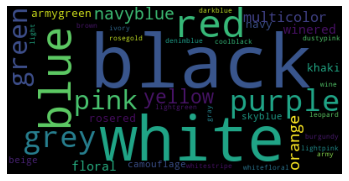

In [19]:
cloud = WordCloud().generate(stat3c)
cloud.to_file('colorQ3.png')
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [20]:
c=pd.DataFrame(stat3c.split(" "))
c1=pd.DataFrame(c[0].value_counts())
c1=c1.sort_values(0,ascending=False)
c1=c1.reset_index()
c1.columns=['color','count']
display(c1.head(10))

,color,count
0,black,77
1,white,52
2,blue,20
3,grey,17
4,purple,17
5,red,17
6,green,13
7,pink,13
8,yellow,9
9,navyblue,7


In [21]:
px.bar(c1.head(5),'color','count',color_discrete_sequence =['#435268']*10)

In [156]:
# 第一分群
stat1c=" ".join(modelData[modelData['units_sold_cluster']==0]['product_color'].astype('str').str.lower().str.split(',').sum())

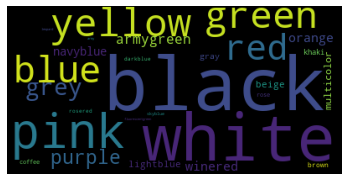

In [157]:
cloud = WordCloud().generate(stat1c)
cloud.to_file('colorQ3.png')
plt.imshow(cloud)
plt.axis('off')
plt.show() 

In [158]:
c=pd.DataFrame(stat1c.split(" "))
c1=pd.DataFrame(c[0].value_counts())
c1=c1.sort_values(0,ascending=False)
c1=c1.reset_index()
c1.columns=['color','count']
display(c1.head(5))

,color,count
0,black,224
1,white,197
2,pink,95
3,yellow,91
4,green,87


In [159]:
px.bar(c1.head(5),'color','count',color_discrete_sequence =['#FCA311']*10,title='第0分群中出現頻率前五名的顏色')

In [60]:
size=pd.DataFrame(data['product_variation_size_id'].value_counts())
size=size.reset_index()
size.columns=["Size","Counts"]
px.bar()

In [62]:
size=size.head(5)

In [64]:
px.bar(size,"Size","Counts",color_discrete_sequence =['#435268']*10)